# 서울시 CCTV 현황 분석 (p.23)
- (가설 1) 인구수가 많으면 CCTV도 많다?
- (가설 2) 노령자, 외국인의 수도 CCTV 수에 영향을 미칠 것이다.

- `pandas`, `matplotlib` 사용

### 데이터 가져오기
1. cctv 설치 현황
    - `서울시 자치구 연도별 CCTV 설치 현황` 구글에 쳐서 나오는 `data.seoul.go.kr` 사이트에서 가져오기
2. 서울시 인구수
    - `서울시 인구 통계` -> 구별 통계

In [1]:
import pandas as pd
cctv_seoul = pd.read_excel('../data/01. cctv_in_seoul.xlsx',
                          encoding='utf-8')
cctv_seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [2]:
cctv_seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [3]:
cctv_seoul.rename(columns = { cctv_seoul.columns[0]: '구별' }, inplace=True)
cctv_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [4]:
pop_seoul = pd.read_excel('../data/01. population_in_seoul.xls',
                          header=2,
                          usecols='B, D, G, J, N',
                         encoding='utf-8')
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10025927,9740398,285529,1468146
1,종로구,162860,151767,11093,27394
2,중구,136663,126409,10254,23025
3,용산구,244989,228830,16159,38531
4,성동구,311290,303158,8132,43662


In [5]:
# 자치구 -> 구별
# 계 -> 인구수
# 계.1 -> 한국인
# 계.2 -> 외국인
# 65세 이상 고령자 -> 고령자
pop_seoul.rename(columns = { pop_seoul.columns[0]: '구별',
                           pop_seoul.columns[1]: '인구수',
                           pop_seoul.columns[2]: '한국인',
                           pop_seoul.columns[3]: '외국인',
                           pop_seoul.columns[4]: '고령자'},
                inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10025927,9740398,285529,1468146
1,종로구,162860,151767,11093,27394
2,중구,136663,126409,10254,23025
3,용산구,244989,228830,16159,38531
4,성동구,311290,303158,8132,43662


## CCTV + 인구 데이터 분석 (p.40)

In [6]:
cctv_seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성 북 구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은 평 구,2962,1365.0,83.0,99.0,343,180,296,229,367


In [7]:
cctv_seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71
24,중 랑 구,1068,NaN,NaN,NaN,770,102,121,66,9
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종 로 구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중 구,1544,25.0,165.0,114.0,80,245,270,317,328


In [8]:
# cctv_seoul['최근 증가율'] = ( cctv_seoul['2018년']+\
#                         cctv_seoul['2017년']+\
#                         cctv_seoul['2016년']) \
#                         / (cctv_seoul['2015년']+\
#                            cctv_seoul['2014년']+\
#                            cctv_seoul['2013년']+\
#                            cctv_seoul['2012년']+\
#                            cctv_seoul['2011년 이전']) * 100
recent = cctv_seoul['2018년']+\
        cctv_seoul['2017년']+\
        cctv_seoul['2016년']

past = cctv_seoul['2015년']+\
       cctv_seoul['2014년']+\
       cctv_seoul['2013년']+\
       cctv_seoul['2012년']+\
       cctv_seoul['2011년 이전']

cctv_seoul['최근 증가율'] = recent / past * 100

cctv_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근 증가율
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425


In [9]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10025927,9740398,285529,1468146
1,종로구,162860,151767,11093,27394
2,중구,136663,126409,10254,23025
3,용산구,244989,228830,16159,38531
4,성동구,311290,303158,8132,43662


In [10]:
pop_seoul.drop([0], inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162860,151767,11093,27394
2,중구,136663,126409,10254,23025
3,용산구,244989,228830,16159,38531
4,성동구,311290,303158,8132,43662
5,광진구,368337,352692,15645,47347


In [11]:
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [12]:
pop_seoul[ pop_seoul['구별'].isnull() ]

,구별,인구수,한국인,외국인,고령자


In [13]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162860,151767,11093,27394
2,중구,136663,126409,10254,23025
3,용산구,244989,228830,16159,38531
4,성동구,311290,303158,8132,43662
5,광진구,368337,352692,15645,47347


#### QUIZ! 외국인 비율, 고령자 비율 계산
- 외국인 비율이 가장 높은 곳? : 영등포
- 외국인 비율이 가장 낮은 곳? : 도봉구
- 고령자 비율이 가장 높은 곳? : 강북구
- 고령자 비율이 가장 낮은 곳? : 송파구

In [14]:
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162860,151767,11093,27394,6.811372,16.820582
2,중구,136663,126409,10254,23025,7.503128,16.848013
3,용산구,244989,228830,16159,38531,6.595806,15.727645
4,성동구,311290,303158,8132,43662,2.612355,14.026149
5,광진구,368337,352692,15645,47347,4.247469,12.854261


In [15]:
pop_seoul.sort_values(by=["인구수", "고령자비율"], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,684338,677489,6849,86062,1.000821,12.575949
16,강서구,600240,593708,6532,82937,1.088231,13.817306
23,강남구,549043,544028,5015,70029,0.913408,12.754739
11,노원구,539829,535282,4547,79968,0.842304,14.813580
21,관악구,519953,502117,17836,74518,3.430310,14.331680


## CCTV + 인구수 병합! (p.53)

In [16]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162860,151767,11093,27394,6.811372,16.820582
2,중구,136663,126409,10254,23025,7.503128,16.848013
3,용산구,244989,228830,16159,38531,6.595806,15.727645
4,성동구,311290,303158,8132,43662,2.612355,14.026149
5,광진구,368337,352692,15645,47347,4.247469,12.854261


In [17]:
cctv_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근 증가율
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425


In [18]:
cctv_seoul['구별'] = cctv_seoul['구별'].replace(
    to_replace=" ",  # 어떤 string을?
    value="", # 무엇으로 ?
    regex = True # regex 유무
)
cctv_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근 증가율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425


In [19]:
data_result = pd.merge(cctv_seoul, pop_seoul, on="구별")
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379,549043,544028,5015,70029,0.913408,12.754739
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078,430522,426219,4303,61710,0.999484,14.333762
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017,317875,314090,3785,59808,1.190720,18.814943
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789,600240,593708,6532,82937,1.088231,13.817306
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425,519953,502117,17836,74518,3.430310,14.331680


In [20]:
del data_result['2011년 이전']
del data_result['2012년']
del data_result['2013년']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
del data_result['2017년']
del data_result['2018년']
data_result.head()

,구별,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,549043,544028,5015,70029,0.913408,12.754739
1,강동구,1879,82.960078,430522,426219,4303,61710,0.999484,14.333762
2,강북구,1265,83.068017,317875,314090,3785,59808,1.190720,18.814943
3,강서구,1617,77.887789,600240,593708,6532,82937,1.088231,13.817306
4,관악구,3985,99.150425,519953,502117,17836,74518,3.430310,14.331680


In [21]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549043,544028,5015,70029,0.913408,12.754739
강동구,1879,82.960078,430522,426219,4303,61710,0.999484,14.333762
강북구,1265,83.068017,317875,314090,3785,59808,1.190720,18.814943
강서구,1617,77.887789,600240,593708,6532,82937,1.088231,13.817306
관악구,3985,99.150425,519953,502117,17836,74518,3.430310,14.331680


#### (cf) 피어슨 상관계수 (corrcoef)
- 절대값 0.1 이하면 무시
- 절대값 0.3 이하면 `약한 상관관계`
- 절대값 0.7 이하면 `뚜렷한 상관관계`

In [22]:
import numpy as np
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.43001097],
       [-0.43001097,  1.        ]])

In [23]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.      , 0.379213],
       [0.379213, 1.      ]])

In [24]:
np.corrcoef(data_result['한국인'], data_result['소계'])

array([[1.        , 0.36279451],
       [0.36279451, 1.        ]])

In [25]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.05979119],
       [-0.05979119,  1.        ]])

In [26]:
## 결과 저장하기
data_result.to_csv('../data/01. cctv_population_result', 
                   sep=',', 
                   encoding='utf-8')

## Matplotlib를 활용한 시각화
- [링크](https://matplotlib.org/index.html)

In [27]:
import matplotlib.pyplot as plt # matplotlib 중에 그래프를 그리는 모듈
# 그래프 결과를 출력 세션?에 나타내기
# 별도의 창으로 빼려면 `%matplotlib qt`
%matplotlib inline

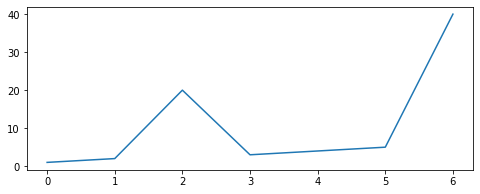

In [28]:
## Matplotlib 예제
plt.figure(figsize=(8,3))
plt.plot([1,2,20,3,4,5,40])
plt.show()

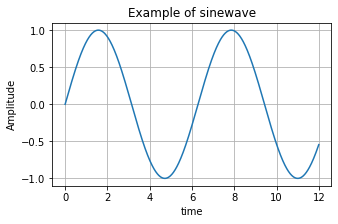

In [29]:
## 예제 - sin 그래프
t = np.arange(0, 12, 0.01) # 0부터 12까지 간격
y = np.sin(t) # sin 함수에 t값을 넣어서 적용
plt.figure(figsize=(5,3))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.plot(t, y)
plt.show()

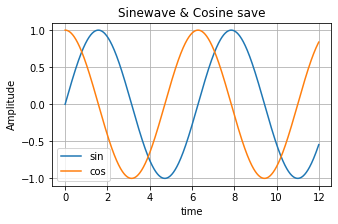

In [30]:
## 그래프 2개
plt.figure(figsize=(5,3))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Sinewave & Cosine save')
plt.show()

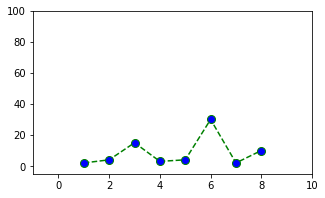

In [31]:
## 그래프에 marker 추가
t = [1,2,3,4,5,6,7,8]
y = [2,4,15,3,4,30,2,10]
plt.figure(figsize=(5,3))
plt.plot(t, y, 
         color='green', 
         linestyle='dashed',
         marker='o', 
         markerfacecolor='blue',
         markersize=8) # marker = 'o' or '<' or '>'
plt.xlim([-1, 10])
plt.ylim([-5, 100])
plt.show()

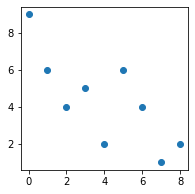

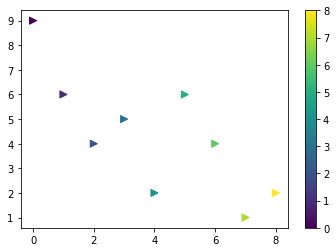

In [32]:
## scatter
t = np.array([0,1,2,3,4,5,6,7,8])
y = np.array([9,6,4,5,2,6,4,1,2])
plt.figure(figsize=(3,3))
plt.scatter(t, y)
plt.show()

plt.scatter(t, y, s=50, c=t, marker='>')
plt.colorbar()
plt.show()

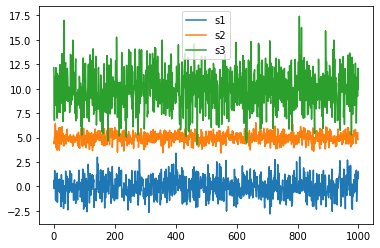

In [33]:
## 정규분포
# loc - 평균, scale - 표준편차
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

plt.figure()
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

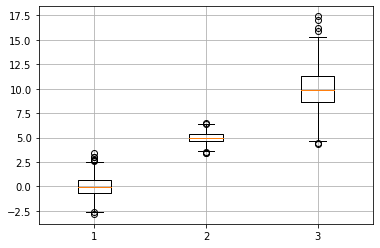

In [34]:
## boxplot
plt.figure()
plt.boxplot( (s1, s2, s3) )
plt.grid()
plt.show()

## CCTV 현황 그래프로 분석

In [35]:
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549043,544028,5015,70029,0.913408,12.754739
강동구,1879,82.960078,430522,426219,4303,61710,0.999484,14.333762
강북구,1265,83.068017,317875,314090,3785,59808,1.190720,18.814943
강서구,1617,77.887789,600240,593708,6532,82937,1.088231,13.817306
관악구,3985,99.150425,519953,502117,17836,74518,3.430310,14.331680


In [36]:
# matplotlib 한글 지원을 위한 코드
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

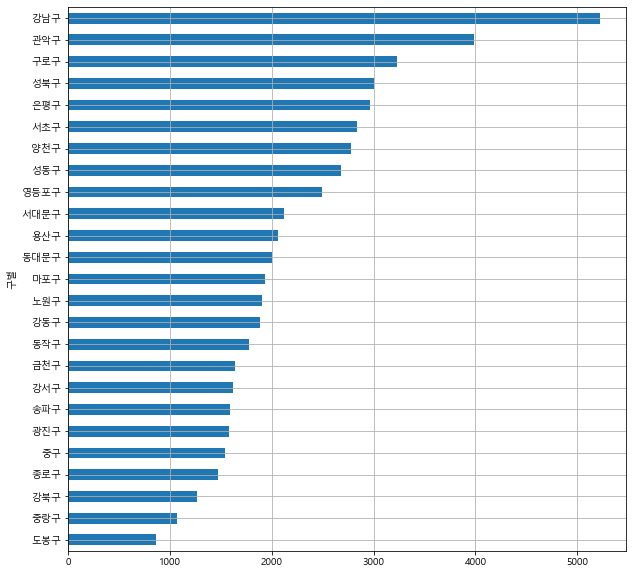

In [37]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

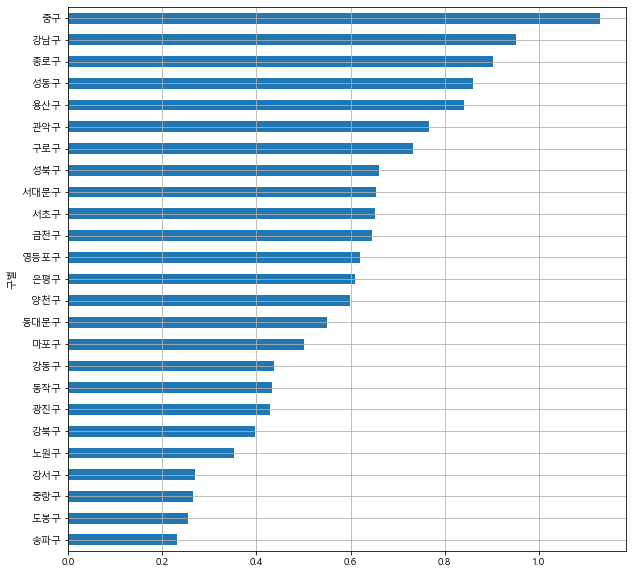

In [38]:
# 인구 수당 CCTV 비율
data_result['CCTV 비율'] = data_result['소계'] /\
        data_result['인구수'] * 100
data_result['CCTV 비율']\
        .sort_values()\
        .plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

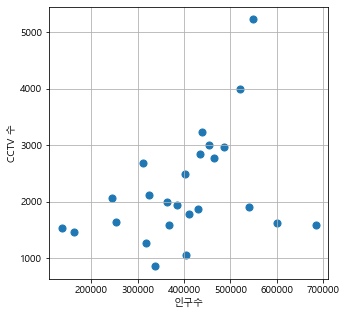

In [39]:
plt.figure(figsize=(5,5))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV 수')
plt.grid()
plt.show()

In [40]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
print(fp1)

[2.86588167e-03 1.07039518e+03]


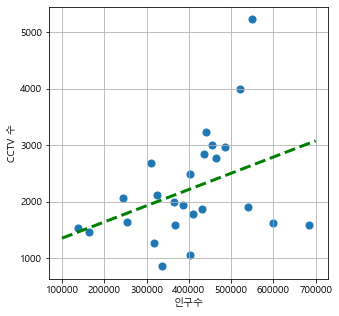

In [41]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100) # 100000~700000까지 100개 만들기
plt.figure(figsize=(5,5))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV 수')
plt.grid()
plt.show()

## Poly1D : one-dimensional polynomial class

#### 예시
- `(x+1) + (x-1)` <- `np.poly1d([1,1]) + np.poly1d([1,-1])`
- `(x+1) * (x-1)` <- `np.poly1d([1,1]) * np.poly1d([1,-1])`

In [42]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100) # 100000~700000까지 100개 만들기

# 오차 계산하기
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV 비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,549043,544028,5015,70029,0.913408,12.754739,0.950927,2577.112547
송파구,1586,62.833676,684338,677489,6849,86062,1.000821,12.575949,0.231757,1445.626913
관악구,3985,99.150425,519953,502117,17836,74518,3.430310,14.331680,0.766415,1424.481045
도봉구,858,66.601942,337594,335280,2314,58070,0.685439,17.201135,0.254151,1179.899640
강서구,1617,77.887789,600240,593708,6532,82937,1.088231,13.817306,0.269392,1173.611997


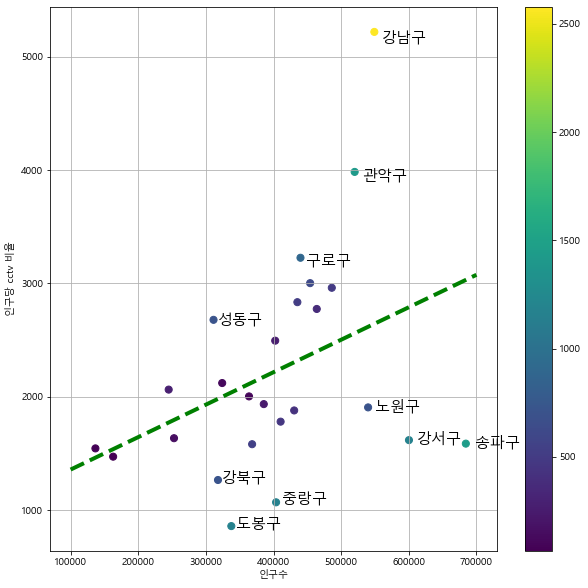

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], # x
            data_result['소계'], # y
            c=data_result['오차'], # color sequence
            s=50) # marker size 
plt.plot(fx, f1(fx), ls='dashed', lw=4, color='g')

# marker에 label 추가
for n in range(10): # range(len(df_sort))
    plt.text(df_sort['인구수'][n]*1.02, 
             df_sort['소계'][n]*0.98, 
             df_sort.index[n],
             fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당 cctv 비율')

plt.colorbar()
plt.grid()
plt.show()

In [44]:
## 결과 저장
df_sort.to_csv('../data/01. cctv_result.csv', sep=',', encoding='utf-8')